In [1]:
import sys
sys.path.append('../')

%matplotlib inline

from adic_graph import *

In [2]:
torch.set_default_dtype(torch.float64)

In [3]:
def to_string(v):
    if v == 0.5:
        return r"$\frac{1}{2}$"
    elif (v - 1/3)**2 < 0.001:
        return r"$\frac{1}{3}$"
    elif (v - 2/3)**2 < 0.001:
        return r"$\frac{2}{3}$"
    elif v == 0.8:
        return r"$\frac{4}{5}$"
    elif (v - 4/7)**2 < 0.001:
        return r"$\frac{4}{7}$"
    else:
        print(v)
        
        
def visualize(graph, n_repeat=1, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length * n_repeat
    fig = plt.figure(figsize=(3*length + 1*(length-1), 3))
    grid = plt.GridSpec(1, 3*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2.5,
    }
        
    
    for t in range(length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+3])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
                     
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t % len(graph.w_list)][i,j] > 0:
                            G.add_edge(str(i), str(j))
                            
                            if i != j:
                                edge_labels[(str(i), str(j))] = to_string(graph.w_list[t % len(graph.w_list)][i, j])
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, **options)
        _, _ = graph.get_neighbors(0)
        
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)
            
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+3:counter+4])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 4       
            

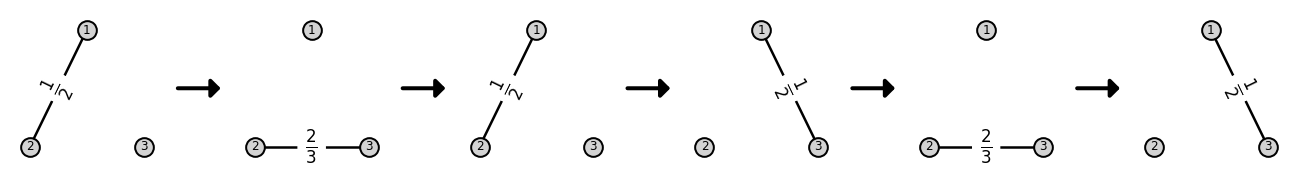

In [4]:
n_nodes = 3
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = AdicGraph(n_nodes, max_degree=max_degree, seed=1)
visualize(g, 2, pos, edge_size=24)
plt.savefig(f"../pic/permutation_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

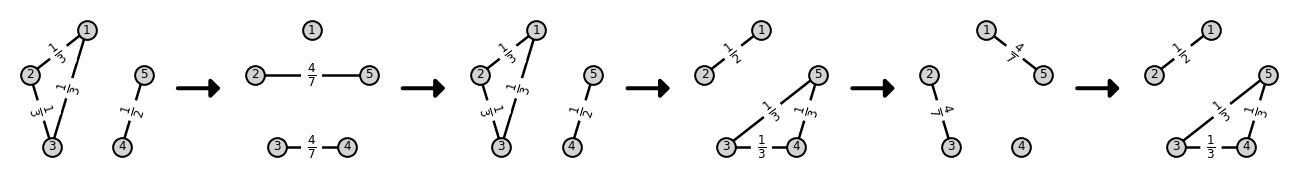

In [5]:
n_nodes = 5
max_degree = 2


g = AdicGraph(n_nodes, max_degree=max_degree, seed=3)
visualize(g, 2, edge_size=17)
plt.savefig(f"../pic/permutation_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)